# just some plots detailing where we end up seeing FAILED values

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def get_failed(df, val): return (df[val] == ' FAILED').sum() / len(df)
def get_gate(df, gate_type='buffer'): return df[df.gate_type == gate_type].reset_index(drop=True)

In [ ]:
run1_df = pd.read_csv('data/run1.csv')
run2_df = pd.read_csv('data/run2.csv')
run3_df = pd.read_csv('data/run3.csv')
run4_df = pd.read_csv('data/run4.csv')
run5_df = pd.read_csv('data/run5.csv')
run1_df.shape, run2_df.shape, run3_df.shape, run4_df.shape, run5_df.shape

((11340, 7), (11340, 7), (11340, 7), (11340, 7), (11340, 7))

In [ ]:
gate_types = run1_df.gate_type.unique()
gate_types

array(['buffer', 'inv_x1', 'inv_x2', 'inv_x4', 'nand2', 'nand3', 'nand4',
       'nor2', 'nor3', 'nor4'], dtype=object)

In [ ]:
time_vals = ['t_rise', 't_fall', 't_delay']

## First lets look at historgrams showing the frequency of failed values based on each independent variable (voltage, thickenss, clock_cycle)

In [ ]:
get_failed(run1_df,'t_delay'), get_failed(run2_df,'t_delay'), get_failed(run3_df,'t_delay'), get_failed(run4_df,'t_delay'), get_failed(run5_df,'t_delay')

(0.0, 0.0, 0.0, 0.0, 0.0)

### we'll skip shpwing t_delay because there are NO failed values for this dependent value -- as shown in the cell below:

In [ ]:
get_failed(run1_df,'t_delay'), get_failed(run2_df,'t_delay'), get_failed(run3_df,'t_delay'), get_failed(run4_df,'t_delay'), get_failed(run5_df,'t_delay')

(0.0, 0.0, 0.0, 0.0, 0.0)

In [ ]:
def plot_hist(df, title=None):
    fig, axes = plt.subplots(2, 3, figsize=(12,8))#plt.figaspect(0.25))
    for idx, ax in enumerate(axes):
        tval = time_vals[idx]
        ax[0].hist(df[df[tval] == ' FAILED'].thickness);
        ax[0].set_title(f'{tval}: thickness')
        ax[1].hist(df[df[tval] == ' FAILED'].voltage);
        ax[1].set_title(f'{tval}: voltage')
        ax[2].hist(df[df[tval] == ' FAILED'].clock_cycle);
        ax[2].set_title(f'{tval}: clock_cycle')
    fig.suptitle(title)

In [ ]:
plt.style.use('classic')
plt.style.use('dark_background')

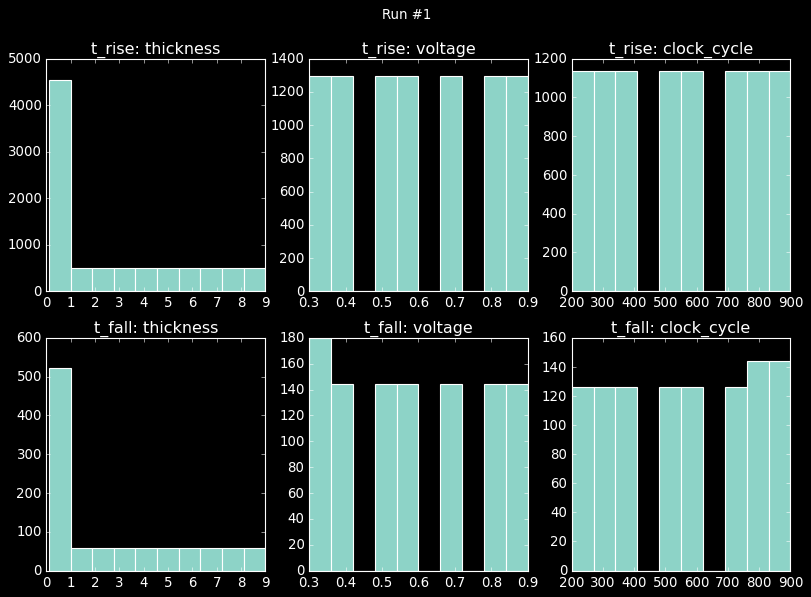

In [ ]:
plot_hist(run1_df, title='Run #1')

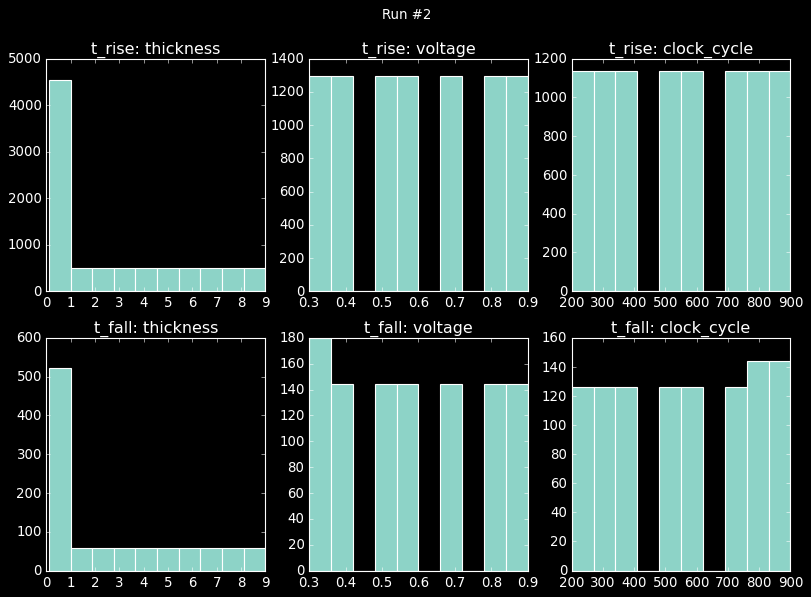

In [ ]:
plot_hist(run1_df, title='Run #2')

### Only showing first two runs because the values for runs 2-5 are all the same

In [ ]:
#plot_hist(run3_df, title='Run #3')

In [ ]:
#plot_hist(run4_df, title='Run #4')

# Now lets shift over to our 3D plots that will show the relation and extent of failed values a bit better

In [ ]:
   def plot_3_3d(df, name, save=False):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    plot_ax(df, 't_fall', ax)
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    plot_ax(df, 't_rise', ax)
    ax = fig.add_subplot(1, 3, 3, projection='3d')    
    plot_ax(df, 't_delay', ax)
    fig.suptitle(name, fontsize=14, y=0.90)
    if save: fig.savefig(f'{name}.png')
    plt.show()
    
def plot_ax(df, y_val, ax=None):
    if ax is None: 
        fig = plt.figure(figsize=plt.figaspect(0.5));
        ax = fig.add_subplot(1,1,1, projection='3d')
    xx = df.clock_cycle.map(lambda x: float(x))
    yy = df.thickness.map(lambda x: float(x))
    zz = df.voltage.map(lambda x: float(x))
    ys = df[f'{y_val}'] == ' FAILED'
    failed_pct = get_failed(df, y_val)
    ax.scatter(xx, yy, zz,  marker='o', c=ys , cmap='Reds', s=25)
    ax.set_xlabel('Clock cycle', fontsize=8)
    ax.set_ylabel('Thickness', fontsize=8, rotation = 0)
    ax.set_zlabel('Voltage', fontsize=8)
    ax.set_title(f'{y_val} fail %: {failed_pct:.2f}');

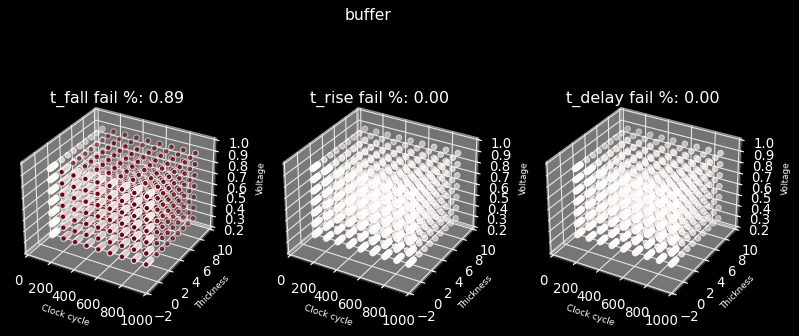

In [ ]:
gate_type = gate_types[0]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

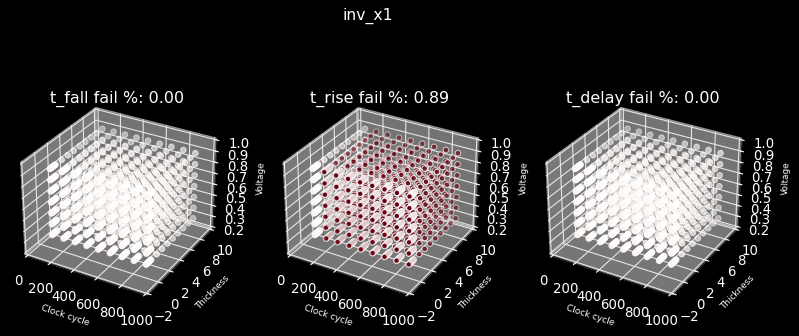

In [ ]:
gate_type = gate_types[1]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

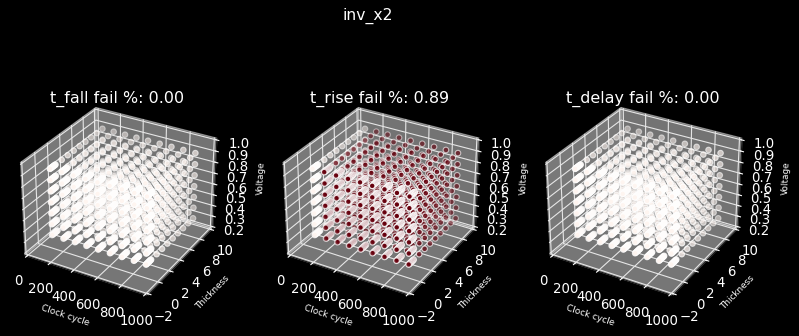

In [ ]:
gate_type = gate_types[2]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

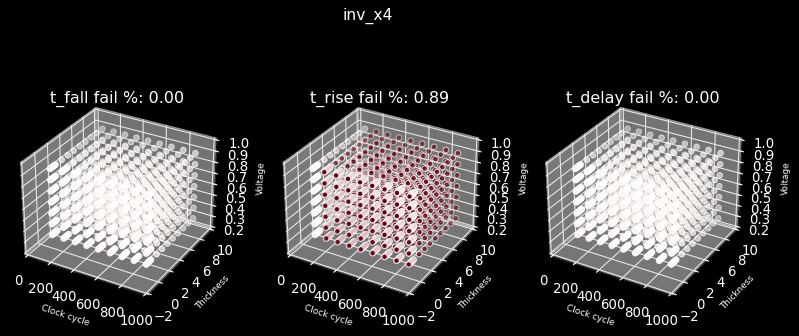

In [ ]:
gate_type = gate_types[3]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

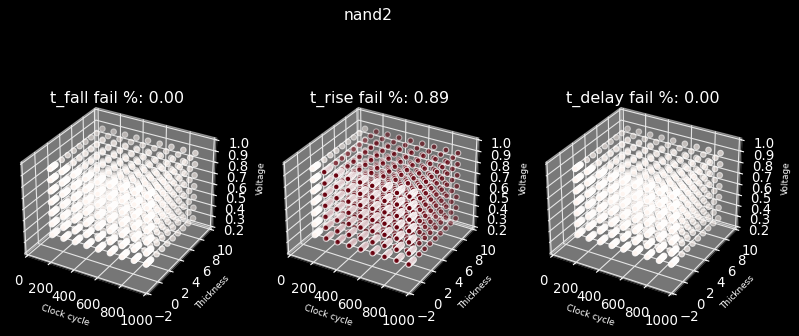

In [ ]:
gate_type = gate_types[4]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

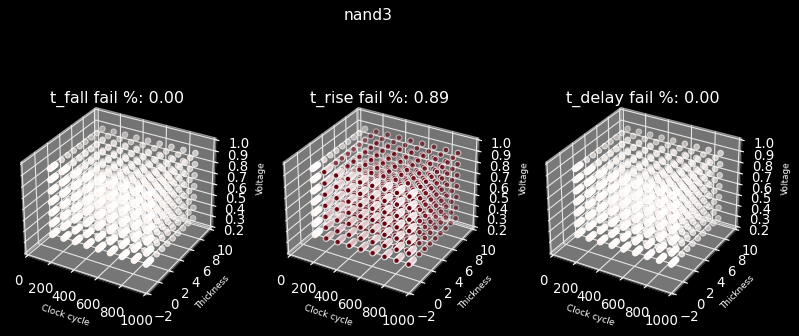

In [ ]:
gate_type = gate_types[5]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

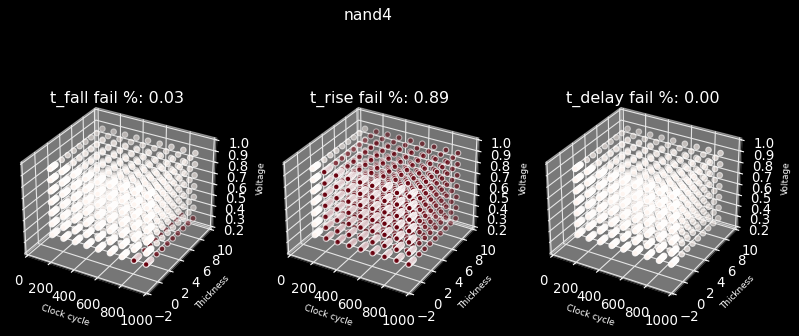

In [ ]:
gate_type = gate_types[6]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

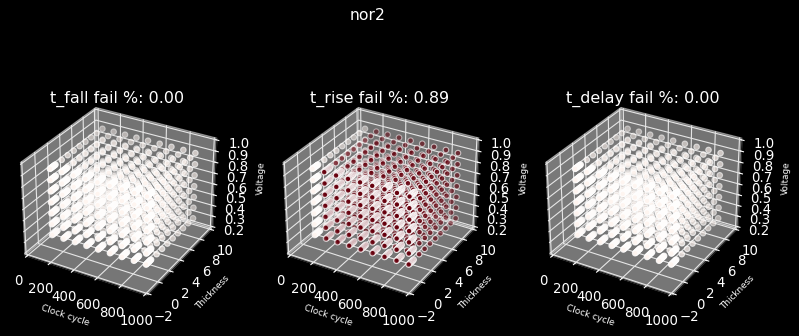

In [ ]:
gate_type = gate_types[7]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

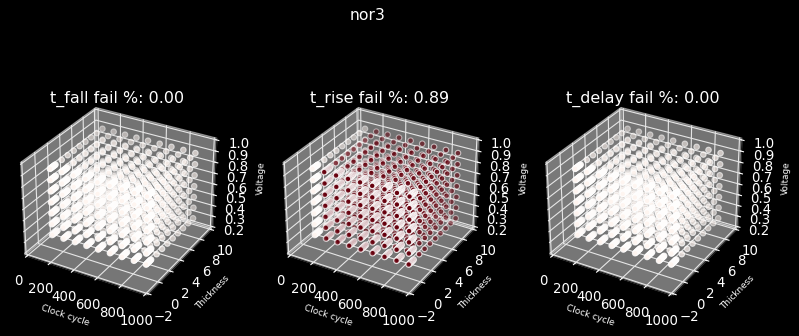

In [ ]:
gate_type = gate_types[8]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

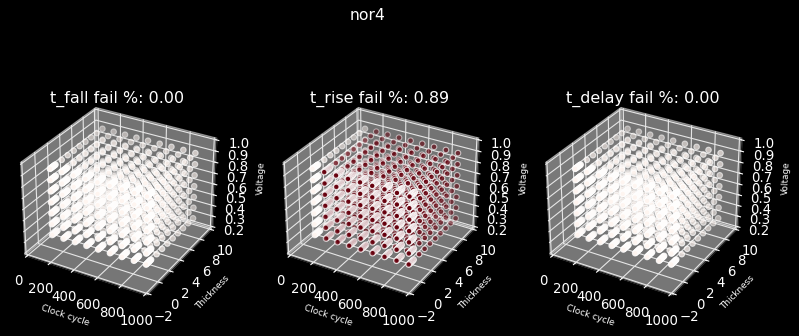

In [ ]:
gate_type = gate_types[9]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

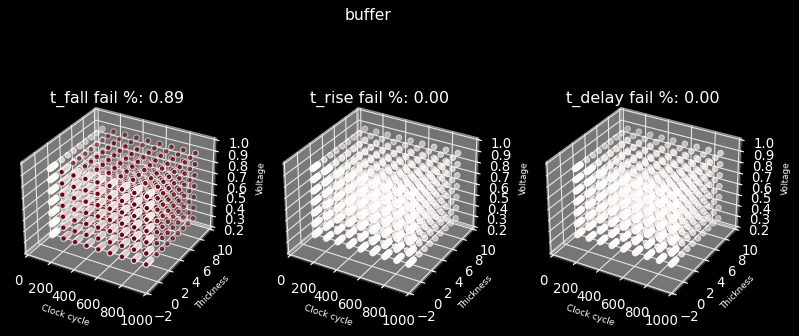

In [ ]:
plt.style.use('dark_background')
gate_type = gate_types[0]
plot_3_3d(get_gate(run2_df, gate_type), gate_type);

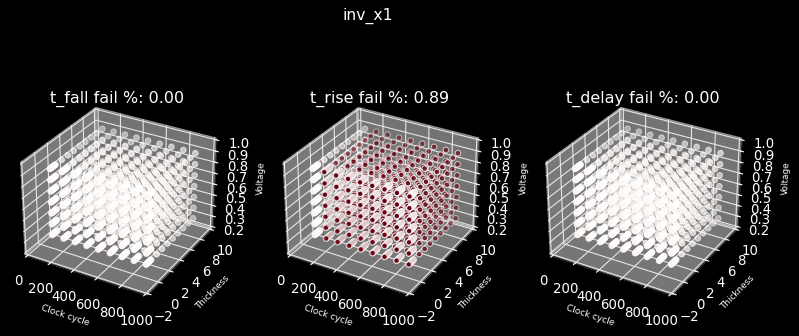

In [ ]:
gate_type = gate_types[1]
plot_3_3d(get_gate(run2_df, gate_type), gate_type);

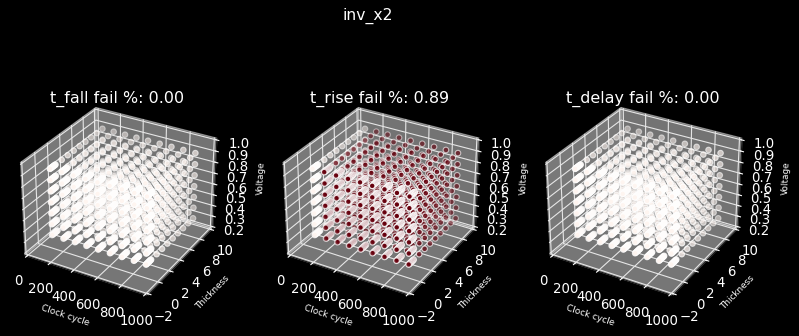

In [ ]:
gate_type = gate_types[2]
plot_3_3d(get_gate(run2_df, gate_type), gate_type);

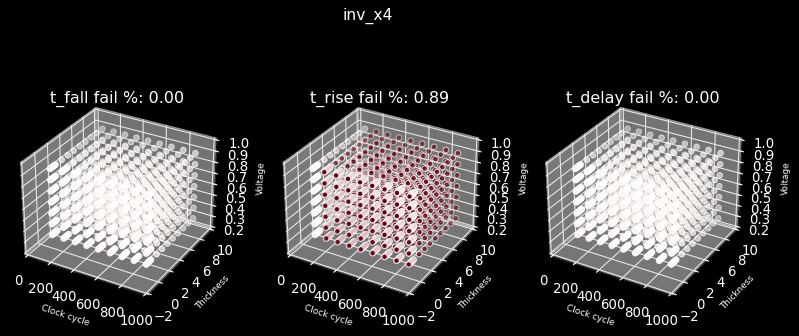

In [ ]:
gate_type = gate_types[3]
plot_3_3d(get_gate(run2_df, gate_type), gate_type);

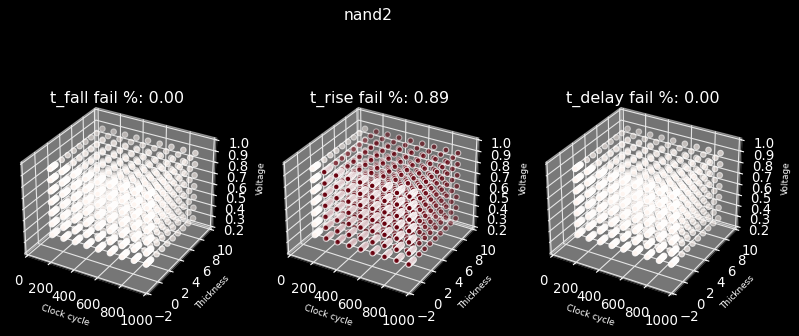

In [ ]:
gate_type = gate_types[4]
plot_3_3d(get_gate(run2_df, gate_type), gate_type);

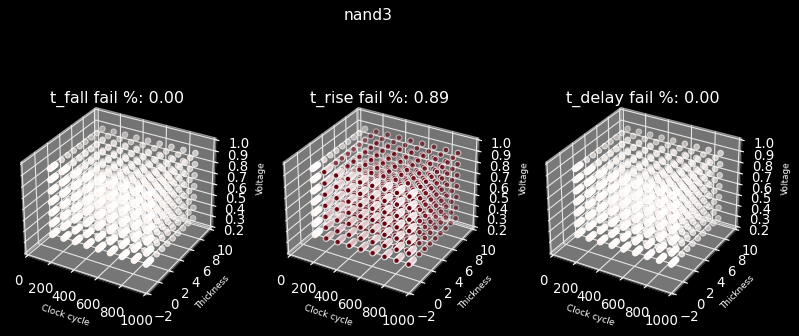

In [ ]:
gate_type = gate_types[5]
plot_3_3d(get_gate(run2_df, gate_type), gate_type);

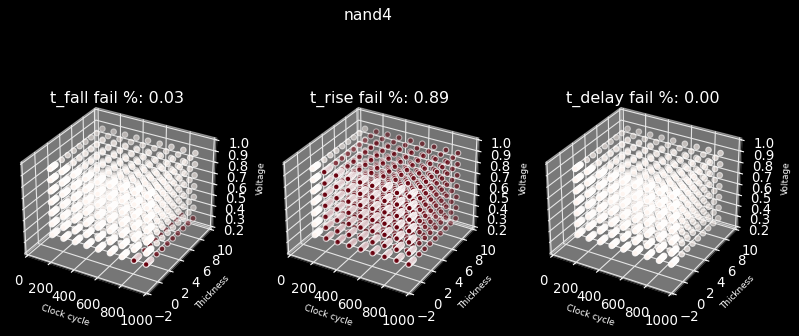

In [ ]:
gate_type = gate_types[6]
plot_3_3d(get_gate(run2_df, gate_type), gate_type);

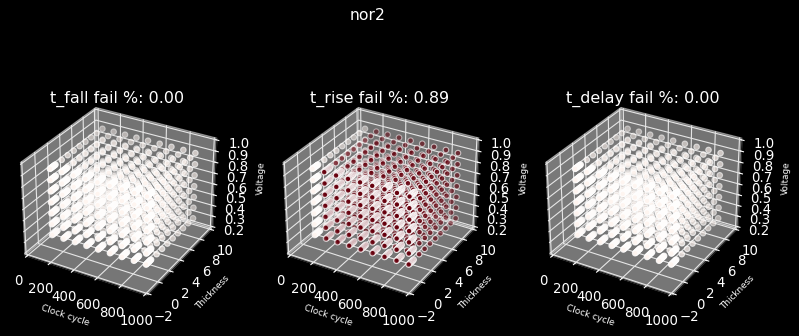

In [ ]:
gate_type = gate_types[7]
plot_3_3d(get_gate(run2_df, gate_type), gate_type);

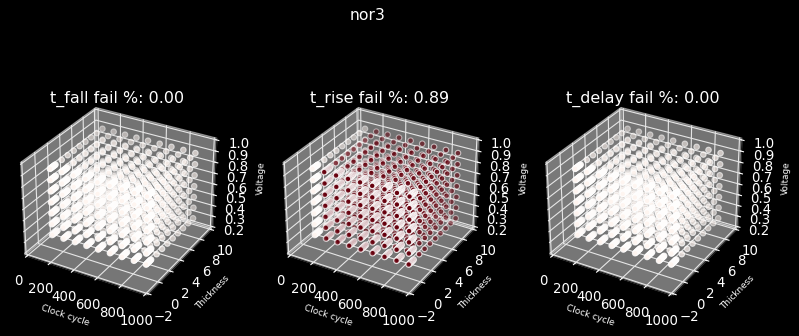

In [ ]:
gate_type = gate_types[8]
plot_3_3d(get_gate(run2_df, gate_type), gate_type);

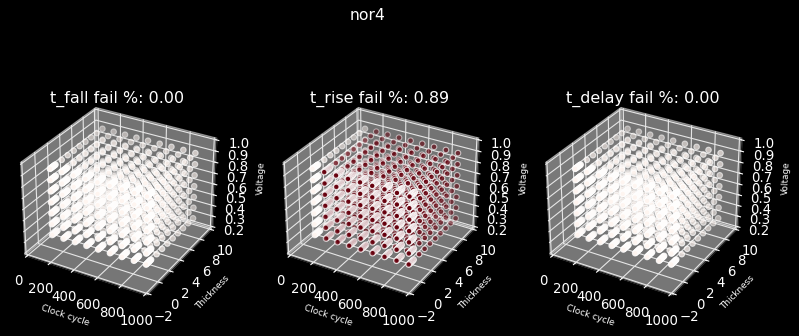

In [ ]:
gate_type = gate_types[9]
plot_3_3d(get_gate(run2_df, gate_type), gate_type);

### Reminder: Only the first two runs are shown because the values for runs 2-5 are all the same